### Assignment 2, Question 3
#### Devon Richtsmeier

### 3. Use your data and find the best hyperparameters of a KNN model, K and p, (for a regression) using GridSearch.

Of the various types of the skin cancer melanoma is the most serious as it has a great propensity to metastasize and spread to other parts of the body. In 2015, 3.1 million people globally were living with melanoma, which led to 59,800 deaths (https://analyticsindiamag.com/melanoma-tumor-size-prediction-weekend-hackathon-15/?ref=morioh.com&utm_source=morioh.com). Unfortunately, as seen in the image below, melanoma can appear very differently between patients, which can easily lead to misdiagnosis. The first step in the diagnosis of the melanoma is an exam by your doctor in which they will ask the patient about symptoms and when the mark appeared and how it has changed in size or appearance, among other things (https://www.cancer.org/cancer/melanoma-skin-cancer/detection-diagnosis-staging/how-diagnosed.html). If it is determined to potentially be melanoma, a number of different biopsy options can be conducted to determine if it is, in fact, melanoma.

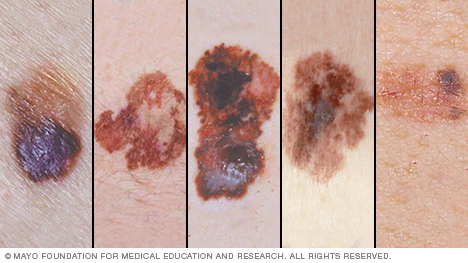

Another important aspect of melanoma, as it can easily spread to the rest of the body, is at what stage it is when diagnosed. This is dependent on the tumor size, as shown in the image below. The larger the tumor, the greater the chance it has reached the subcutaneous tissue and has spread. This cannot easily be determined without a biopsy or other procedure. 
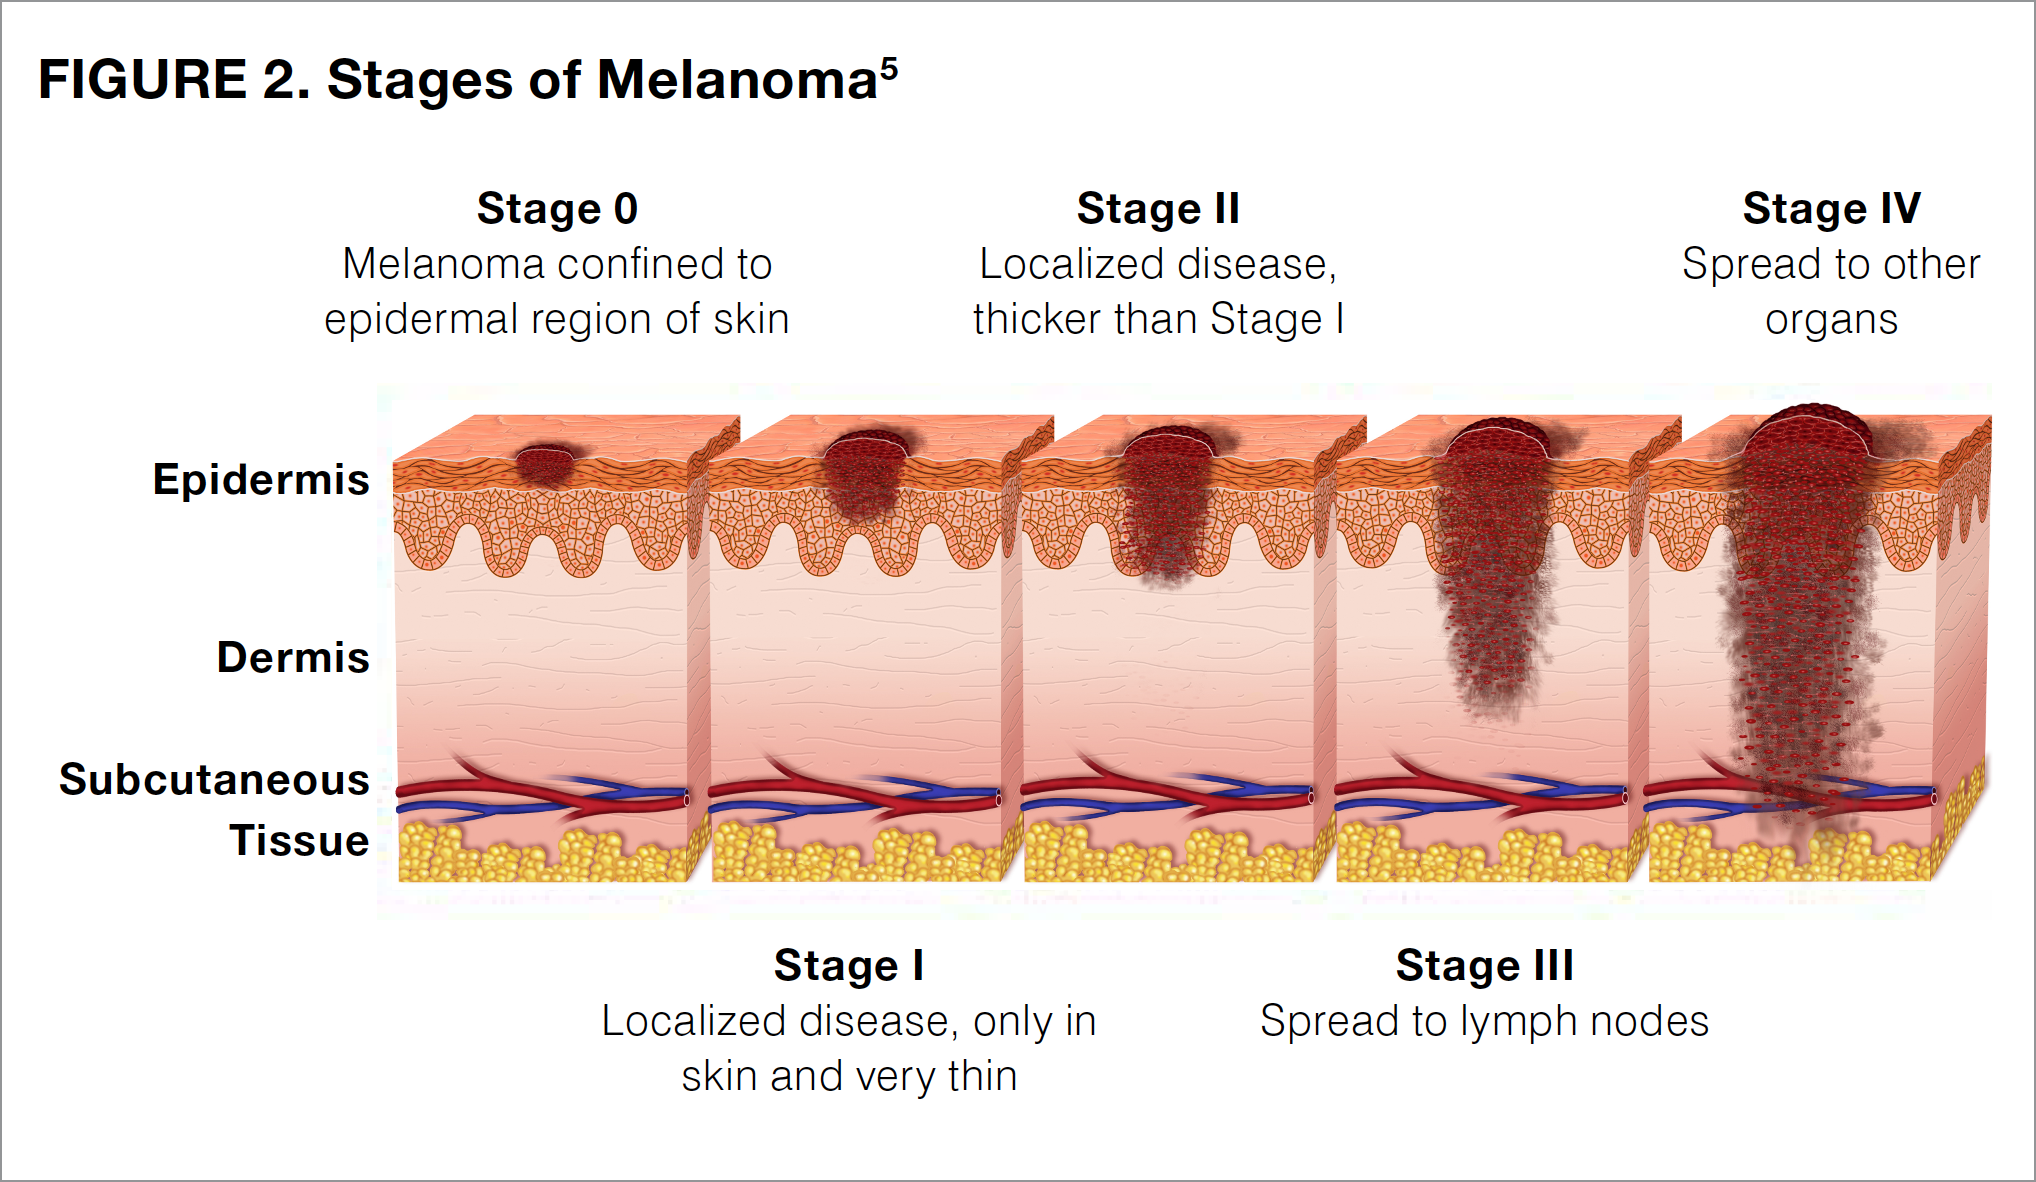
https://www.aimatmelanoma.org/stages-of-melanoma/

One potentialy solution is whether machine learning could determine the tumor size based on the surface characteristics of the melanoma. This would give doctors a better idea of the stage of the cancer quickly, which could expedite treatment for the patient.

The data set I'm interested in, which follows this idea, is from a MachineHack Hackathon and consists of the 9,146 patients, each with nine features which describe the surface characteristics of the melanoma. The target is the size of the tumor in each of the cases. The features and target are described below.

* mass_npea:  the mass of the area understudy for melanoma tumor
* size_npear: the size of the area understudy for melanoma tumor
* malign_ratio: ration of normal to malign surface understudy
* damage_size: unrecoverable area of skin damaged by the tumor
* exposed_area: total area exposed to the tumor
* std_dev_malign: standard deviation of malign skin measurements
* err_malign: error in malign skin measurements
* malign_penalty: penalty applied due to measurement error in the lab
* damage_ratio: the ratio of damage to total spread on the skin
* tumor_size: size of melanoma_tumor (target)

The data can be found here: https://www.kaggle.com/anmolkumar/machine-hack-melanoma-tumor-size-prediction

I'm interested in seeing which features are most deterministic of tumor size.

#### Towards this end of determining the size of the tumor based on surface characteristics of the melanoma, I am looking at KNN regression. I will be using GridSearch to find the best hyperparameters of the KNN model which will best fit the data to give us the best outcome in terms of determining tumor size.

### Import the necessary Python packages including:
* numpy for the array capabilities
* pandas for data visualization and manipulation
* matplotlib for plotting
* scikit-learn for its data processing, regressors, feature extraction
* seaborn just to have a nice plotting surface

In [16]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Use seaborn to set the plotting style
sns.set_style('whitegrid')

# Know when the packages have finished importing.
print('Packages imported.')

Packages imported.


#### First we want to load the data and display the first 5 rows to give us an idea of what the data looks like. And we can see what kinds of numbers were looking at for each of the features.

In [2]:
# Load the melanoma data using pandas
skin_data = pd.read_csv('skin_cancer.csv')

# Display the first 5 rows of data
skin_data.head(n=5)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


#### We'll, of course, need to normalize the data as the different features have extremely different numbers, often orders of magnitude apart from the adjacent features. 

#### Next, we'll look at the number of non-finite data we have in each feature column to determine whether or not any data cleaning is necessary.

In [3]:
# Display the info about each of the columns to see if cleaning is necessary
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


#### All the columns appear to have the same number of finite elements as the RangeIndex at the top of the info page, so cleaning does not appear to be necessary at this time.

#### Next we'll look at the histograms of the data before normalization to get an idea of what the distribution of the various features looks like.

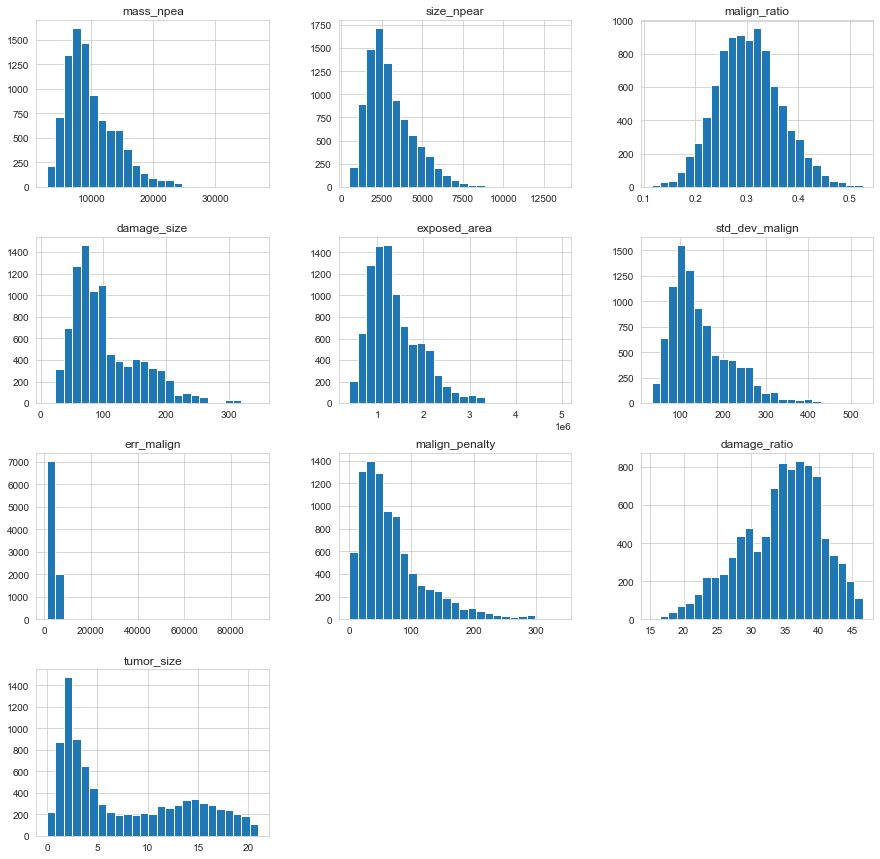

In [4]:
# All data histograms so that we can look at the distributions before and after normalization

skin_data.hist(bins=25, figsize=(15, 15))
plt.show()

#### Now we'll set up the input and target data by separating the features from the tumor size. Tumor size will be the target. Then we'll display the shapes of the input and target to verify we still have the same size of data.

In [5]:
# Set the input and target data
input_skin = skin_data[['mass_npea', 'size_npear', 'malign_ratio', 'damage_size', 'exposed_area', 'std_dev_malign', 
                        'err_malign', 'malign_penalty', 'damage_ratio']].values
target_skin = skin_data['tumor_size'].values

# Print the shapes of the data to make sure the size is the same (number of rows)
print(f'Input shape: {np.shape(input_skin)}')
print(f'Target shape: {np.shape(target_skin)}')

Input shape: (9146, 9)
Target shape: (9146,)


#### Our data is separated into target and input, and the size is the same so we can continue onwards.

#### Next, we'll separate the input and target randomly into a training and validation set for each using train_test_split from scikit-learn. We'll set aside 25% of the input and corresponding target data for validation.

In [6]:
# Training input, validation input, training target, validation target
# Separately
input_tr, input_va, target_tr, target_va = train_test_split(input_skin, target_skin, test_size=0.25)

# Print the new sizes of the various training and validation sets
print(f'Training set shapes: {np.shape(input_tr)}, {np.shape(target_tr)}')
print(f'Validation set shapes: {np.shape(input_va)}, {np.shape(target_va)}')

Training set shapes: (6859, 9), (6859,)
Validation set shapes: (2287, 9), (2287,)


#### Again, we make sure that the training and validation data sets have the same size, which they do.

#### Then we'll check to make sure the distributions for the training and validation sets are roughly the same, though the numbers in the validation set will be roughly 25% of the training set. We can set the col_num variable between 0 and 8 (9 features) to see the differences between the different columns (features).


Text(0.5, 1.0, 'Validation set')

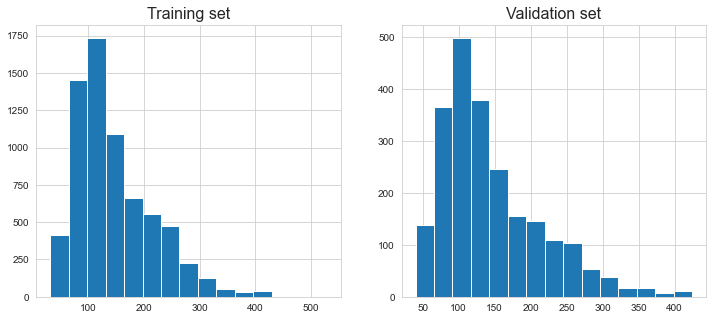

In [7]:
# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

#### Now we'll normalize the data in order to scale all the features in the same way. Here we're using standard normalization.

In [8]:
# Apply a standard normalization to the input data
stnd_scaler = StandardScaler().fit(input_tr)
input_tr_norm = stnd_scaler.transform(input_tr)  # Normalize training data
input_va_norm = stnd_scaler.transform(input_va)  # Normalize the validation data

#### After normalization we want to look at the histograms of the data again to double check the distributions of the training and validation set haven't changed in terms of their shape and that their shape remains the same as what they were above.

Text(0.5, 1.0, 'Validation set')

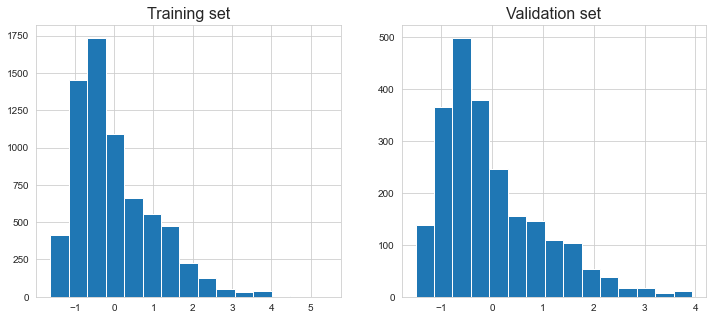

In [9]:
# Examine the input data after normalization for both the training and validation sets

# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr_norm[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va_norm[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

#### Once we have our data normalized and the distributions looks good we can look for the best hyperparameters (k and p) using the GridSearch function from scikit-learn in order to find the best model for our data.

In [10]:
# Import GridSearch
from sklearn.model_selection import GridSearchCV

# Set the parameters to go over to be the same as we looked at above
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 50], 'p': [1, 2]}]

# Again set up the regressor
reg = KNeighborsRegressor()

# Perform the GridSearch
grid_search = GridSearchCV(reg, param_grid, cv=5)

# And fit
grid_search.fit(input_tr_norm, target_tr)

# Print the best parameters
best_params = grid_search.best_params_
print(f'The best parameters from GridSearchCV are: {best_params}')

The best parameters from GridSearchCV are: {'n_neighbors': 7, 'p': 1}


#### Once GridSearch has found the best parameters to use for our data, we want to train a model using those best parameters found above for the K neighbors regressor, and see how it performs.

Text(25, 0.5, '$\\mu=0.8548$\n$\\mathrm{med}=0.0473$\n$\\sigma=4.3266$')

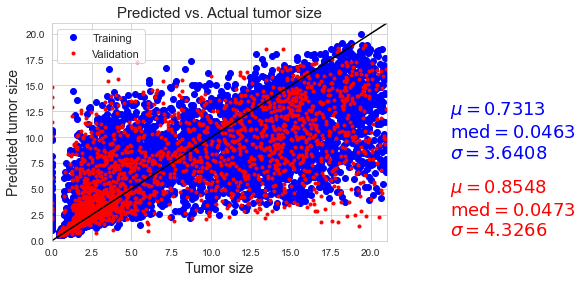

In [19]:
# The KNN regressor, with the best params found above
reg = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], p=best_params['p'])

# Fit the model with un-normalized training set
reg.fit(input_tr_norm, target_tr) 

# Use the regressor to prediction the results for training and validation sets
target_tr_pred = reg.predict(input_tr_norm)  
target_va_pred = reg.predict(input_va_norm)

# Set up the figure to plot the results for both the training and validations set
fig = plt.figure(figsize=(6, 4))
plt.plot(target_tr, target_tr_pred, 'ob') # Training actual vs. predicted in blue
plt.plot(target_va, target_va_pred, '.r')  # Validation actual vs. predicted in red

# Plot a line of slope 1 and intercept 0 to see how well the data agrees with the prediction
plt.plot(np.arange(0, 25, .1),  np.arange(0, 25, .1), '-k')
plt.title('Predicted vs. Actual tumor size', fontsize=15)
plt.xlabel('Tumor size', fontsize=14)
plt.ylabel('Predicted tumor size', fontsize=14)
plt.legend(['Training', 'Validation'], fontsize=11)
plt.xlim([0,21])
plt.ylim([0,21])

# Calculate the statistical information for the predicted sets
mu_tr = np.mean(target_tr - target_tr_pred)
median_tr = np.median(target_tr - target_tr_pred)
sigma_tr = np.std(target_tr - target_tr_pred)

mu_va = np.mean(target_va - target_va_pred)
median_va = np.median(target_va - target_va_pred)
sigma_va = np.std(target_va - target_va_pred)

# Add the statistical information regarding training and validation predictions to the side of the plot
text_tr = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_tr, median_tr, sigma_tr)
text_va = '$\mu=%.4f$\n$\mathrm{med}=%.4f$\n$\sigma=%.4f$'%(mu_va, median_va, sigma_va)
plt.text(25, 8, text_tr, color='b', fontsize=18)
plt.text(25, 0.5, text_va, color='r', fontsize=18)

#### We get relatively good agreement between the training and validation sets, however even with the best hyperparameters we don't see good prediction for the tumor size. We mostly see a wide range of values for the predicted tumor size at each targeted tumor size meaning the model is essentially overall just predicting the mean of the data. But it's not really predicing the average well either since the spread in the predicted size and each actual size is quite large.

#### We'll also examine a few metrics including the difference between the predicted and target values and how they are distributed (immediately below) and the systematic error (3 cells down).

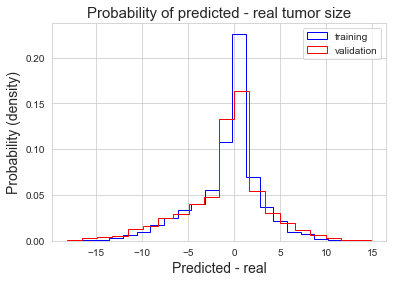

In [18]:
# If the size validation set and training set are different, 
# it would be better to normalize the distributions for a better comparison.
plt.hist(target_tr_pred - target_tr, 20, color='b', histtype='step', density=True, label='training')
plt.hist(target_va_pred - target_va, 20, color='r', histtype='step', density=True, label='validation')
plt.title('Probability of predicted - real tumor size', fontsize=15)
plt.xlabel('Predicted - real', fontsize=14)
plt.ylabel('Probability (density)', fontsize=14)
plt.legend()

#### We get good agreement between the training and validation sets, however the spread in the difference between the predicted and real values is quite large, which supports the predicted vs. actual tumor size plot above.

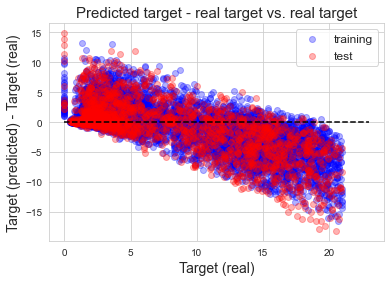

In [20]:
# Inspecting systematic errors for the training set and validation set together 
plt.scatter(target_tr, target_tr_pred - target_tr, label='training', color='b', alpha=.3)
plt.scatter(target_va, target_va_pred - target_va, label='test', color='r', alpha=.3)
plt.title('Predicted target - real target vs. real target', fontsize=15)
plt.xlabel('Target (real)', fontsize=14)
plt.ylabel('Target (predicted) - Target (real)', fontsize=14)
plt.plot([0,23], [0,0], '--k')
plt.legend(fontsize=12)

#### This plot shows a wide range in the systematic error at each target value and that the model predicts sizes that are too large for small tumors and generally too small for large tumors. Again, this supports the fact the model is essentially predicting the average of the target data.

## Conclusion

#### More data manipulation in terms of possible feature extraction and other methods could be useful in making a more robust model. As it stands, even with the best hyperparameters, the model predicts the average of the target data, and that not very well.